In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1. Regression - Module - (Housing Prices).csv')
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [3]:
df['Sale Price'].mean()

540198.4357443658

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\2025724521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition_sale'][df['Condition of the House'] == str(i)]=df['Sale Price'][df['Condition of the House']==str(i)].mean()


<function matplotlib.pyplot.show(close=None, block=None)>

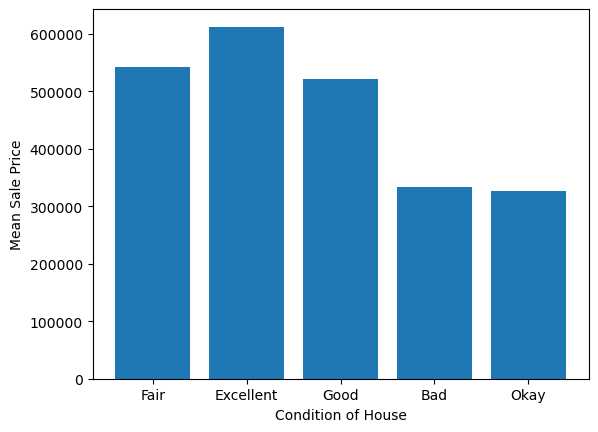

In [4]:
#Initializing new Column
df['condition_sale'] = 0

#Calculating mean based on the condition of the houses
for i in df['Condition of the House'].unique():
    df['condition_sale'][df['Condition of the House'] == str(i)]=df['Sale Price'][df['Condition of the House']==str(i)].mean()
    
 # ploting the mean based onthe condition of house
plt.figure(dpi =100)
plt.bar(df['Condition of the House'].unique(),df['condition_sale'].unique())
plt.xlabel('Condition of House')
plt.ylabel('Mean Sale Price')
plt.show

In [5]:
df['zip_condition_sale']=0
 
C='Condition of the House'
Z ='Zipcode'

for i in df[C].unique():
    for j in df[Z].unique():
        df['zip_condition_sale'][(df[C]==str(i)) & (df[Z]==j)] = df['Sale Price'][(df[C]==str(i)) & (df[Z]==j)].mean()

len(df['zip_condition_sale'].unique())

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\1986256657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip_condition_sale'][(df[C]==str(i)) & (df[Z]==j)] = df['Sale Price'][(df[C]==str(i)) & (df[Z]==j)].mean()


281

In [6]:
import time
#Initialising a new column
df['zip_condition_sale'] = 0

C = 'Condition of the House'
Z = "Zipcode"

tick = time.time()
# Calculating mean based on the condition of the House and zipcode
for i in df[C].unique():
  for j in df[Z].unique() :
    df['zip_condition_sale'][(df[C] == str(i)) & (df[Z] == j) ] = df['Sale Price'][(df[C] == str(i)) & (df[Z] == j)].mean()
tock = time.time()
time1 = tock - tick
len(df['zip_condition_sale'].unique())

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\508732720.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip_condition_sale'][(df[C] == str(i)) & (df[Z] == j) ] = df['Sale Price'][(df[C] == str(i)) & (df[Z] == j)].mean()


281

In [7]:
zip_condition_sale = df.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()
zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [8]:
zip_condition_sale2  = pd.pivot_table(df, index=["Condition of the House","Zipcode"], values=["Sale Price"], aggfunc=np.mean,)
zip_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [9]:
zip_condition_sale3  = pd.pivot_table(df, index=["Zipcode"], columns = ['Condition of the House'], values=["Sale Price"], aggfunc=np.mean)
zip_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [10]:
df['plot_length'] = df['Flat Area (in Sqft)']**0.5
df['plot_length'].head()

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot_length, dtype: float64

In [11]:
df['total_area'] = df['Flat Area (in Sqft)'] + df['Lot Area (in Sqft)']
df['total_area'].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total_area, dtype: float64

In [12]:
df['Condition of the House'][df['Condition of the House'] == 'Fair'] = '1'
df['Condition of the House'][df['Condition of the House'] == 'Okay'] = '0'
df['Condition of the House'][df['Condition of the House'] == 'Bad'] = '0'
df['Condition of the House'][df['Condition of the House'] == 'Good'] = '1'
df['Condition of the House'][df['Condition of the House'] == 'Excellent'] = '3'
df['Condition of the House'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\1814442613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition of the House'][df['Condition of the House'] == 'Fair'] = '1'
C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\1814442613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition of the House'][df['Condition of the House'] == 'Okay'] = '0'
C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\1814442613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

array(['1', '3', '0'], dtype=object)

In [13]:
df['Condition of the House'] = df['Condition of the House'].map({'Good':'1',
                                                                     'Excellent':'3',
                                                                     'Bad':'0',
                                                                     'Fair': '1',
                                                                     'Okay': '0'})
df['Condition of the House'].unique()

array([nan], dtype=object)

In [14]:
df['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [15]:
year = []
for i in range(len(df['Date House was Sold'])):
    k = df['Date House was Sold'][i].split()[-1]
    year.append(k)

df['year_sold'] = year
df['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [17]:
3*1**3

3

In [25]:
a=[1,2,3,4,5]
b=[6,7,8,9]

In [27]:
c=b.extend(a)
print(c)

None
